In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

#load datasets
wine = datasets.load_wine()
df = pd.DataFrame(wine.data)
y = wine.target
z = wine.data

#split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)
print ("Dimensions of the Training Data Set are: \n",X_train.shape, y_train.shape,"\n")
print ("Dimensions of the Test Data Set are: \n",X_test.shape, y_test.shape,"\n")

#Selecting Two Attributes for training and testing sets
best2 = SelectKBest(score_func=chi2, k=2)
best2.fit(X_train, y_train)
best2_attributes = best2.get_support(indices = True)
extracted2 = [df.columns[iterator] for iterator in best2_attributes]
X_train = X_train[extracted2]
X_test = X_test[extracted2]

print ("\n The shape of the extracted train set features are: \n",X_train.shape)
print ("\n The shape of the extracted test set  features are: \n",X_test.shape)

############ SVM Linear Model #################################
#Building a SVM model with Kernal = 'Linear', using One vs One method.
svclassifier = SVC(kernel='linear', decision_function_shape = 'ovo')  
svclassifier.fit(X_train, y_train) 

#Prediction using SVM linear
y_pred = svclassifier.predict(X_test) 

#Calculating the confusion matrix and the classification Report.
print("\n The confusion Matrix for the SVM linear Kernal is: \n", confusion_matrix(y_test,y_pred))  
print("\n The classification Report for the SVM linear Kernal is: \n",classification_report(y_test,y_pred))









Dimensions of the Training Data Set are: 
 (124, 13) (124,) 

Dimensions of the Test Data Set are: 
 (54, 13) (54,) 


 The shape of the extracted train set features are: 
 (124, 2)

 The shape of the extracted test set  features are: 
 (54, 2)

 The confusion Matrix for the SVM linear Kernal is: 
 [[19  0  1]
 [ 1 18  1]
 [ 0  1 13]]

 The classification Report for the SVM linear Kernal is: 
              precision    recall  f1-score   support

          0       0.95      0.95      0.95        20
          1       0.95      0.90      0.92        20
          2       0.87      0.93      0.90        14

avg / total       0.93      0.93      0.93        54



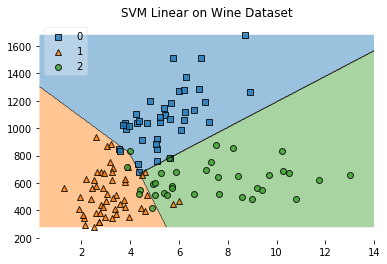

In [2]:
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
x = np.asarray(X_train)
y = np.asarray(y_train)
plot_decision_regions(x, y, clf=svclassifier, legend=2)
plt.title('SVM Linear on Wine Dataset')
plt.show()
    
    



In [ ]:
#References:

#https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
#https://anaconda.org/conda-forge/mlxtend
